In [39]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib


In [2]:
# Step 2: Data Collection
# Load the datasets
world_cups = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\DS projects\FIFA World Cup Analysis\WorldCups.csv")
world_cup_matches = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\DS projects\FIFA World Cup Analysis\WorldCupMatches.csv")
World_Cup_Players = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\DS projects\FIFA World Cup Analysis\WorldCupPlayers.csv")

In [4]:
# Step 3: Exploratory Data Analysis (EDA)
# Display the first few rows of the datasets to understand their structure
print("World Cups Dataset:")
print(world_cups.head())


World Cups Dataset:
   Year      Country      Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938       France       Italy         Hungary   Brazil      Sweden   
3  1950       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0           70              13             18    590.549  
1           70              16             17    363.000  
2           84              15             18    375.700  
3           88              13             22  1.045.246  
4          140              16             26    768.607  


In [5]:
print("\nWorld Cup Matches Dataset:")
print(world_cup_matches.head())


World Cup Matches Dataset:
     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0              

In [6]:
print("\nWorld Cup Players Dataset:")
print(World_Cup_Players.head())


World Cup Players Dataset:
   RoundID  MatchID Team Initials           Coach Name Line-up  Shirt Number  \
0      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   
1      201     1096           MEX     LUQUE Juan (MEX)       S             0   
2      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   
3      201     1096           MEX     LUQUE Juan (MEX)       S             0   
4      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   

        Player Name Position Event  
0       Alex THEPOT       GK   NaN  
1   Oscar BONFIGLIO       GK   NaN  
2  Marcel LANGILLER      NaN  G40'  
3      Juan CARRENO      NaN  G70'  
4   Ernest LIBERATI      NaN   NaN  


In [11]:
# step 4: Data Cleaning
# Analysts play a crucial role in cleaning data to ensure accuracy
# Check for missing values
print("\nMissing values in World Cups dataset:")
print(world_cups.isnull().sum())

print("\nMissing values in World Cup Matches dataset:")
print(world_cup_matches.isnull().sum())

print("\nMissing values in World Cup Players dataset:")
print(World_Cup_Players.isnull().sum())


Missing values in World Cups dataset:
Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

Missing values in World Cup Matches dataset:
Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

Missing values in World Cup Players dataset:
RoundID              0
MatchID              0
Team Initials    

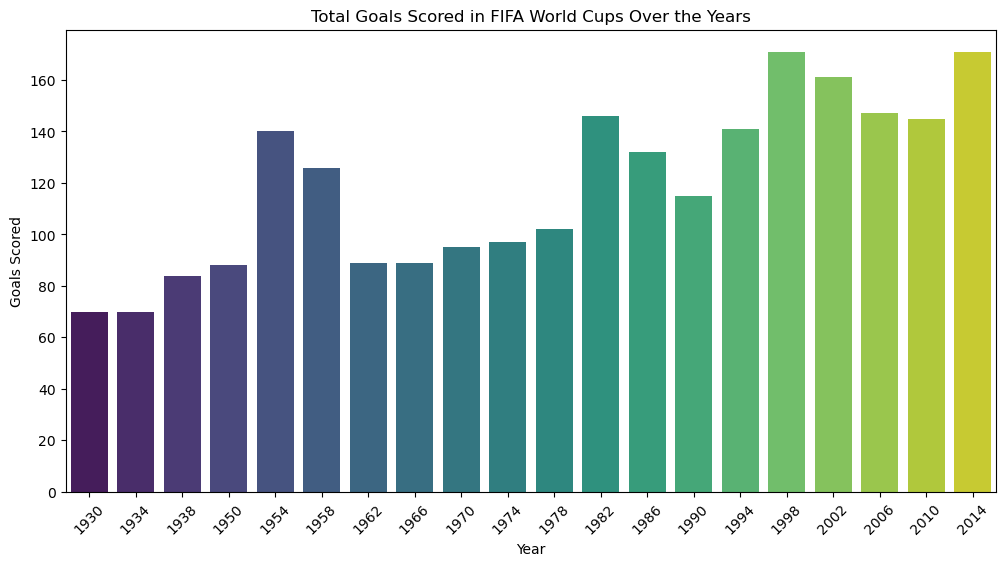

In [12]:
# step 5: Data Visualization
# Analyzing the total goals scored in World Cups over the years
plt.figure(figsize=(12, 6))
sns.barplot(data=world_cups, x='Year', y='GoalsScored', palette='viridis')
plt.title('Total Goals Scored in FIFA World Cups Over the Years')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45)
plt.show()

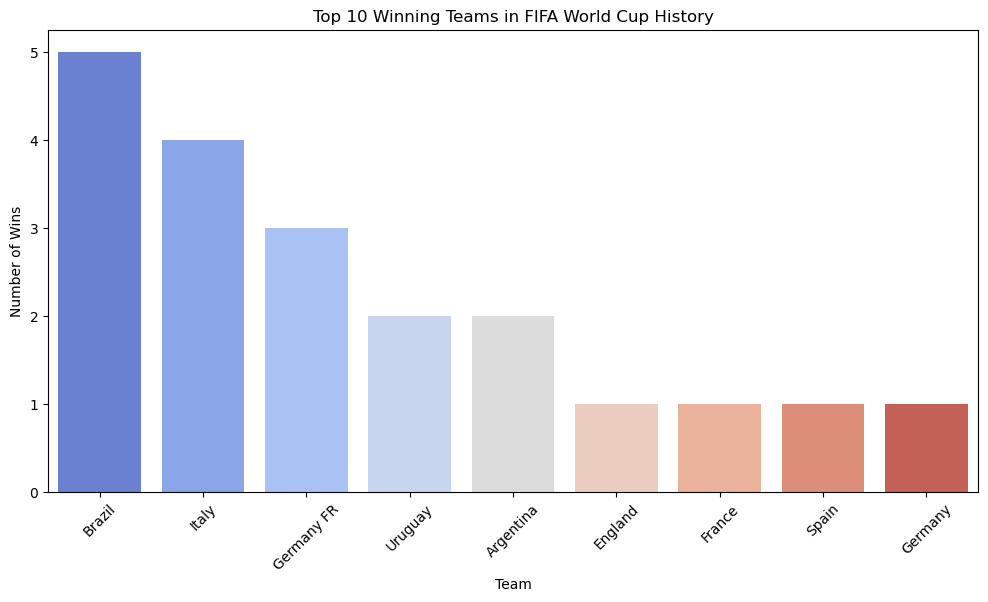

In [13]:
# Analyzing the winning teams
winning_teams = world_cups['Winner'].value_counts().reset_index()
winning_teams.columns = ['Team', 'Wins']

plt.figure(figsize=(12, 6))
sns.barplot(data=winning_teams.head(10), x='Team', y='Wins', palette='coolwarm')
plt.title('Top 10 Winning Teams in FIFA World Cup History')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()


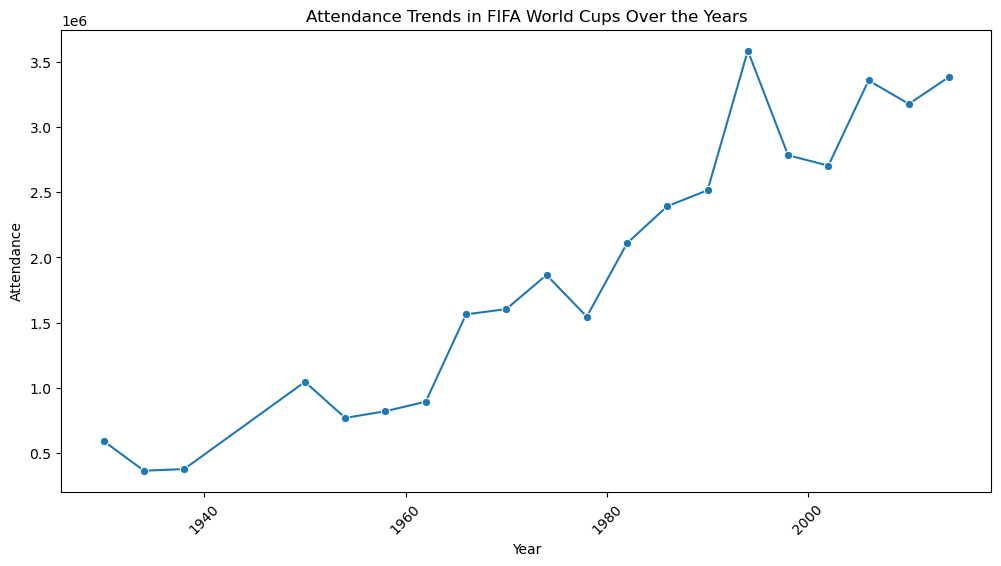

In [14]:
# Analyzing attendance trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=world_cups, x='Year', y='Attendance', marker='o')
plt.title('Attendance Trends in FIFA World Cups Over the Years')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.show()

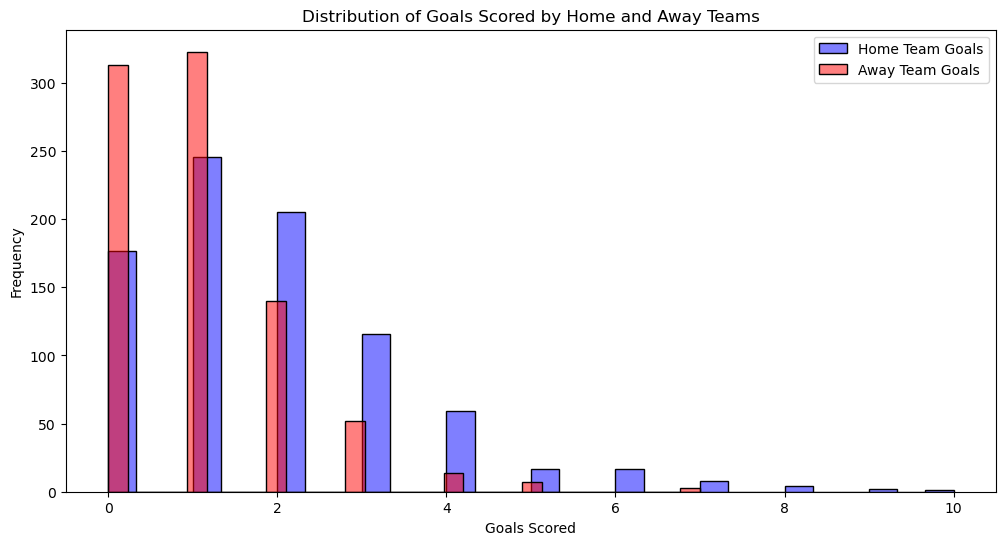

In [15]:
# Match-level analysis: Goals scored by home and away teams
plt.figure(figsize=(12, 6))
sns.histplot(data=world_cup_matches, x='Home Team Goals', bins=30, color='blue', label='Home Team Goals', alpha=0.5)
sns.histplot(data=world_cup_matches, x='Away Team Goals', bins=30, color='red', label='Away Team Goals', alpha=0.5)
plt.title('Distribution of Goals Scored by Home and Away Teams')
plt.xlabel('Goals Scored')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [27]:
# Step 6: Feature Engineering
# Create a new DataFrame for modeling
features = world_cup_matches[['Year', 'Home Team Goals', 'Away Team Goals']].copy()

# Use .loc to avoid SettingWithCopyWarning
features.loc[:, 'Match Result'] = np.where(features['Home Team Goals'] > features['Away Team Goals'], 'Home Win', 
                                            np.where(features['Home Team Goals'] < features['Away Team Goals'], 'Away Win', 'Draw'))

# Convert categorical variables to numerical
features = pd.get_dummies(features, columns=['Match Result'], drop_first=True)

# Display the first few rows of the features DataFrame
print(features.head())

     Year  Home Team Goals  Away Team Goals  Match Result_Draw  \
0  1930.0              4.0              1.0                  0   
1  1930.0              3.0              0.0                  0   
2  1930.0              2.0              1.0                  0   
3  1930.0              3.0              1.0                  0   
4  1930.0              1.0              0.0                  0   

   Match Result_Home Win  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  


In [37]:
# Step 7: Prepare Data for Modeling
# Assuming features DataFrame has already been created and cleaned

# Check for missing values in the features DataFrame
print("Missing values in features DataFrame:")
print(features.isnull().sum())


Missing values in features DataFrame:
Year                     0
Home Team Goals          0
Away Team Goals          0
Match Result_Draw        0
Match Result_Home Win    0
dtype: int64


In [32]:
# Step 8: Handle Missing Values
# Option 1: Drop rows with missing values
features = features.dropna()

In [33]:
# features.fillna(features.mean(), inplace=True)  # Filling with mean for numerical features

# Split the data into features and target variable
X = features[['Year', 'Home Team Goals', 'Away Team Goals']]
y = features['Match Result_Home Win']  # Assuming this is the target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Step 9: Model Training
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Step 10: Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.99      1.00      0.99        96

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [38]:
# Step 8: Model Deployment
# Save the trained model
joblib.dump(model, 'world_cup_winner_model.pkl')
print("\nModel saved as 'world_cup_winner_model.pkl'")


Model saved as 'world_cup_winner_model.pkl'


In [17]:
# Saving the cleaned datasets for future use
world_cups.to_csv('Cleaned_WorldCups.csv', index=False)
world_cup_matches.to_csv('Cleaned_WorldCupMatches.csv', index=False)


In [18]:
# Conclusion: Analysts' Role
print("\nConclusion:")
print("Data analysts play a crucial role in collecting, cleaning, and analyzing World Cup data.")
print("Their work ensures that fans receive accurate statistics and insights, enhancing the overall experience of the tournament.")


Conclusion:
Data analysts play a crucial role in collecting, cleaning, and analyzing World Cup data.
Their work ensures that fans receive accurate statistics and insights, enhancing the overall experience of the tournament.


In [ ]:
# Here’s a step-by-step code implementation for a data science project based on the FIFA World Cup datasets. The code covers the entire process from problem definition to model deployment, focusing on predicting the winner of a World Cup match based on historical data.
# Step 1: Problem Definition
# The goal is to predict the winner of a World Cup match using historical match data.
# Step 2: Data Collection
# We'll use the provided datasets: WorldCups.csv and WorldCupMatches.csv. Ensure these files are in your working directory.
# Step 3: Exploratory Data Analysis (EDA)
# This step involves loading the data and performing initial analysis to understand the datasets.
# Step 4: Feature Engineering
# Creating features that will help in predicting the match outcomes.
# Step 5: Model Selection
# Choosing an appropriate model for classification.
# Step 6: Model Training
# Training the selected model on the training dataset.
# Step 7: Model Evaluation
# Evaluating the model's performance using metrics like accuracy.
# Step 8: Model Deployment
# Saving the model for future predictions.